___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import polars as pl
import polars.selectors as cs
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [2]:
df = pl.read_csv('../../DATA/heart.csv')

In [3]:
df.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

target
i64
0
1


### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [5]:
# CODE HERE

In [4]:
df.null_count()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# CODE HERE

In [5]:
df.describe()

statistic,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.39934,0.729373,2.313531,0.544554
"""std""",9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.52586,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
"""min""",29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",48.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
"""50%""",55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,2.0,1.0
"""75%""",61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0
"""max""",77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

In [13]:
# CODE HERE!

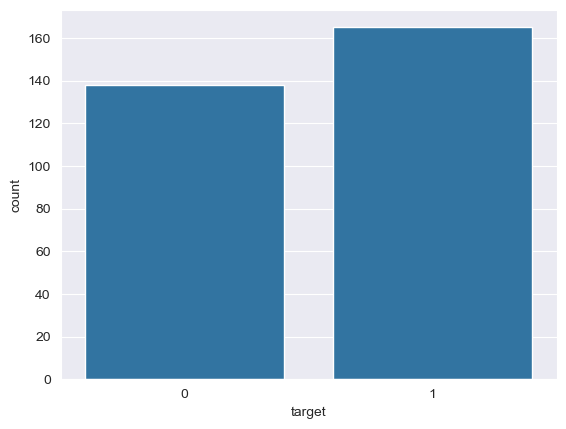

In [6]:
sns.countplot(data=df, x='target')
plt.show()

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

In [11]:
# CODE HERE

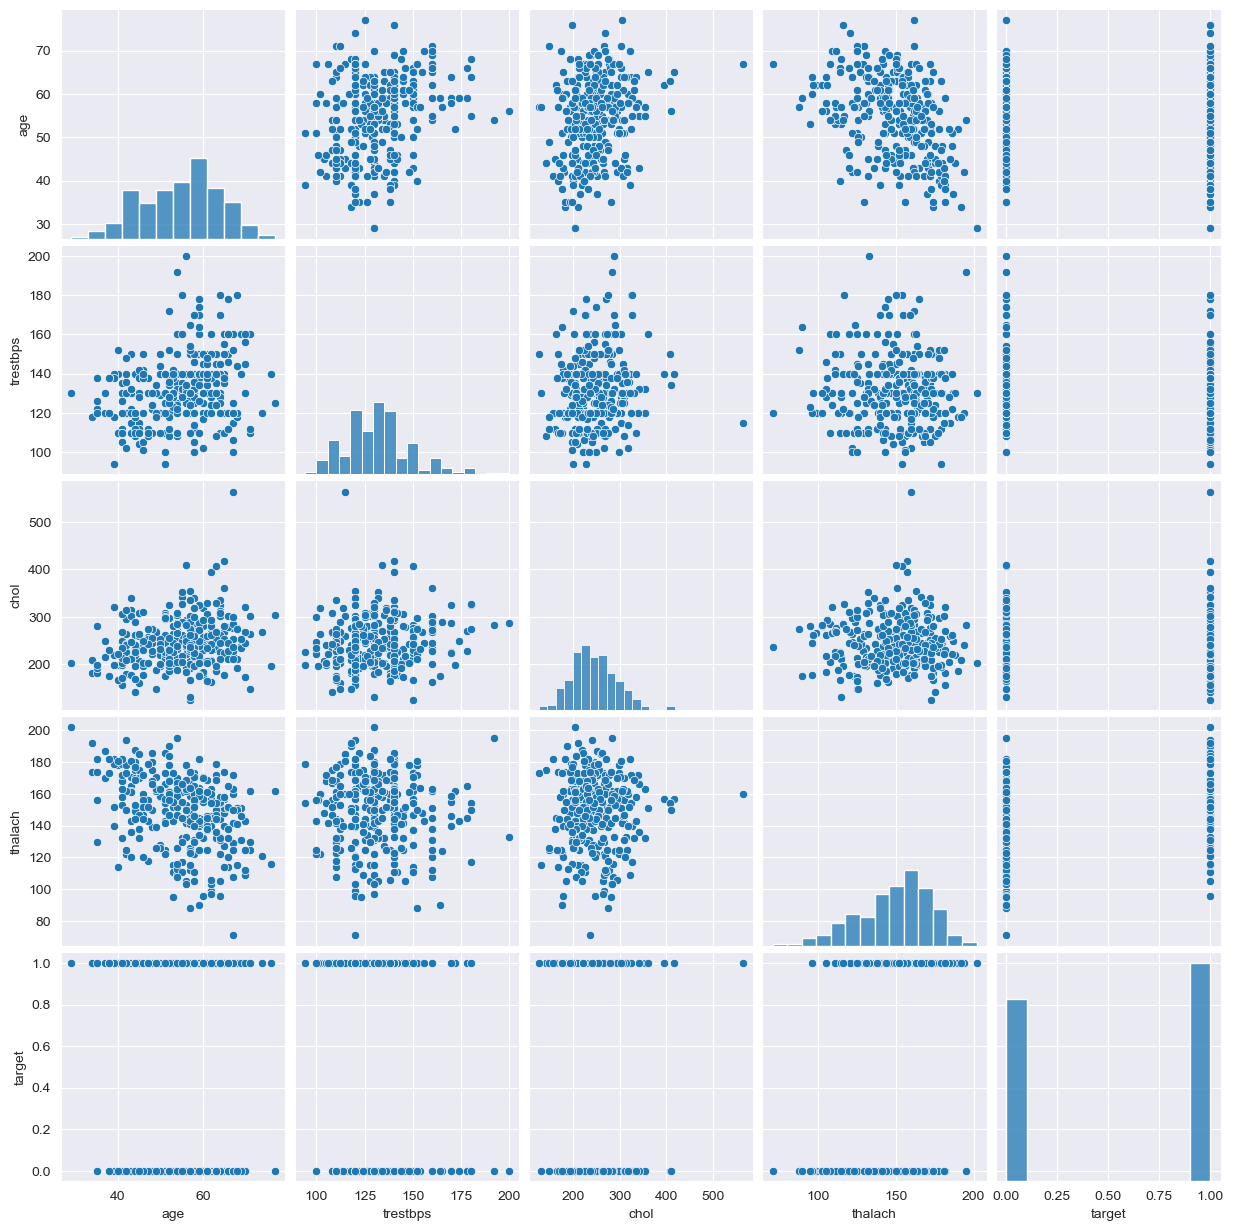

In [7]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']].to_pandas())

**TASK: Create a heatmap that displays the correlation between all the columns.**

In [27]:
# CODE HERE

<Axes: >

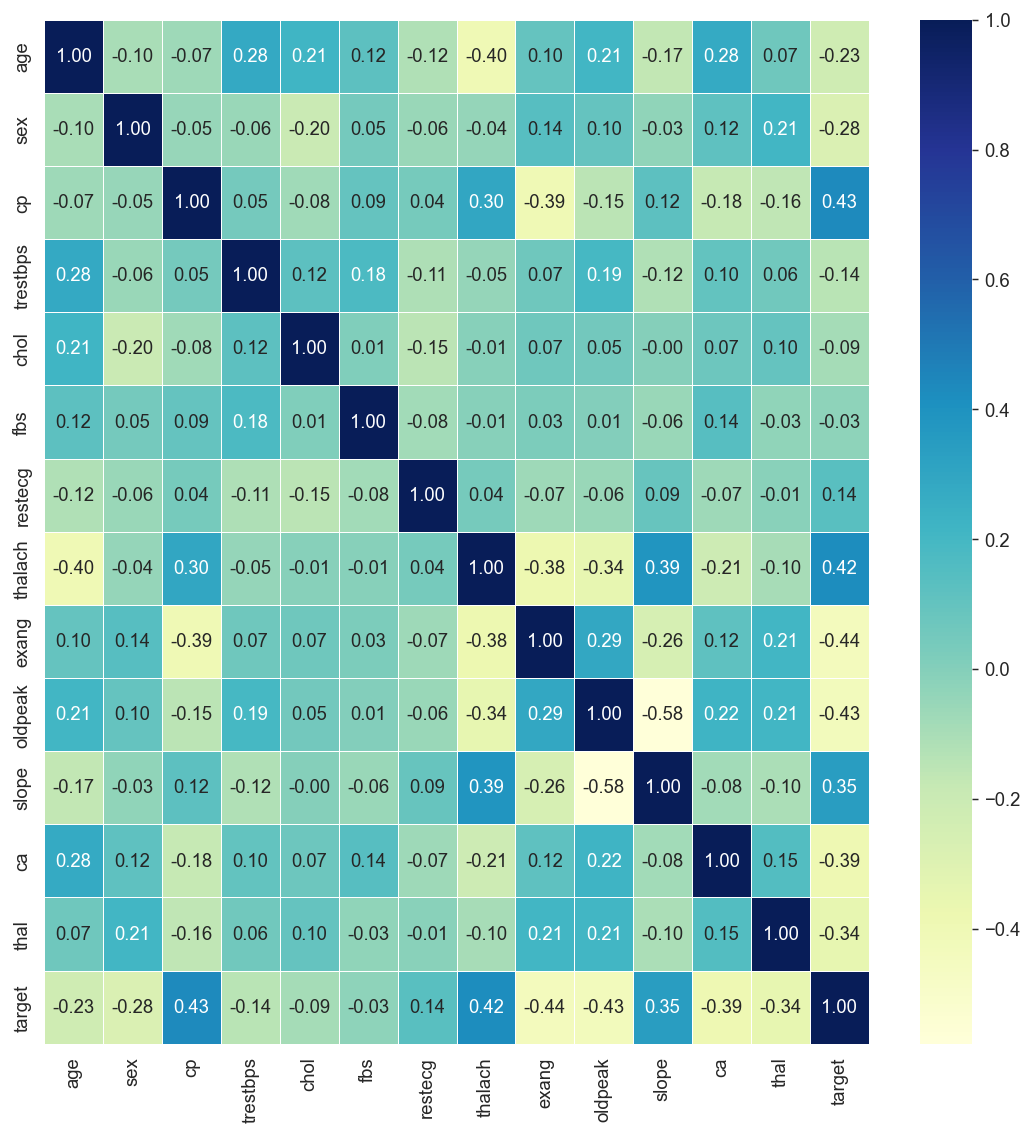

In [8]:
plt.figure(figsize=(10,10), dpi=133, facecolor='w', edgecolor='k')
sns.heatmap(
    data=df.corr(),
    annot=True,
    fmt=".2f",
    linewidths=.5,
    cmap="YlGnBu",
    xticklabels=df.columns,
    yticklabels=df.columns,
)

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [16]:
# CODE HERE

In [9]:
X = df.select(cs.exclude('target'))
y = df['target']

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [18]:
# CODE HERE

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [21]:
# CODE HERE

In [10]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [24]:
# CODE HERE

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [26]:
# help(LogisticRegressionCV)

In [29]:
log_model = LogisticRegression()

In [69]:
param_grid = {'C': np.logspace(-5, 5, 500)}

In [70]:
grid_model = GridSearchCV(
    log_model,
    param_grid,
    cv=5,
    n_jobs=-1,
)

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [29]:
# CODE HERE

In [71]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 1.04722519e-05, 1.09668060e-05, 1.14847155e-05,
       1.20270833e-05, 1.25950646e-05, 1.31898690e-05, 1.38127630e-05,
       1.44650734e-05, 1.51481892e-05, 1.58635653e-05, 1.66127252e-05,
       1.73972643e-05, 1.82188534e-05, 1.90792422e-05, 1.99802631e-05,
       2.09238348e-05, 2.19119669e-0...
       3.46001639e+04, 3.62341632e+04, 3.79453285e+04, 3.97373038e+04,
       4.16139055e+04, 4.35791301e+04, 4.56371628e+04, 4.77923865e+04,
       5.00493910e+04, 5.24129830e+04, 5.48881961e+04, 5.74803016e+04,
       6.01948197e+04, 6.30375315e+04, 6.60144909e+04, 6.91320378e+04,
       7.23968114e+04, 7.58157646e+04, 7.93961785e+04, 8.31456781e+04,
       8.70722485e+04, 9.11842520e+04, 9.54904456e+04, 1.00000000e+05])})

### Coeffecients

**TASK: Report back the model's coefficients.**

In [72]:
pl.DataFrame({
    'feature': X.columns, 'coefficient': grid_model.best_estimator_.coef_[0]}).sort('coefficient', descending=True)

feature,coefficient
str,f64
"""cp""",0.535851
"""thalach""",0.299498
"""slope""",0.251251
"""restecg""",0.08069
"""fbs""",0.025074
…,…
"""exang""",-0.334654
"""oldpeak""",-0.352645
"""thal""",-0.374603


array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**BONUS TASK: We didn't show this in the lecture notebooks, but you have the skills to do this! Create a visualization of the coefficients by using a barplot of their values. Even more bonus points if you can figure out how to sort the plot! If you get stuck on this, feel free to quickly view the solutions notebook for hints, there are many ways to do this, the solutions use a combination of pandas and seaborn.**

In [33]:
#CODE HERE

In [73]:
coefs = pl.DataFrame({'Coefficient': grid_model.best_estimator_.coef_[0]})

In [75]:
coefs = coefs.sort('Coefficient', descending=True)
coefs

Coefficient
f64
0.535851
0.299498
0.251251
0.08069
0.025074
…
-0.334654
-0.352645
-0.374603


<Axes: xlabel='None', ylabel='Coefficient'>

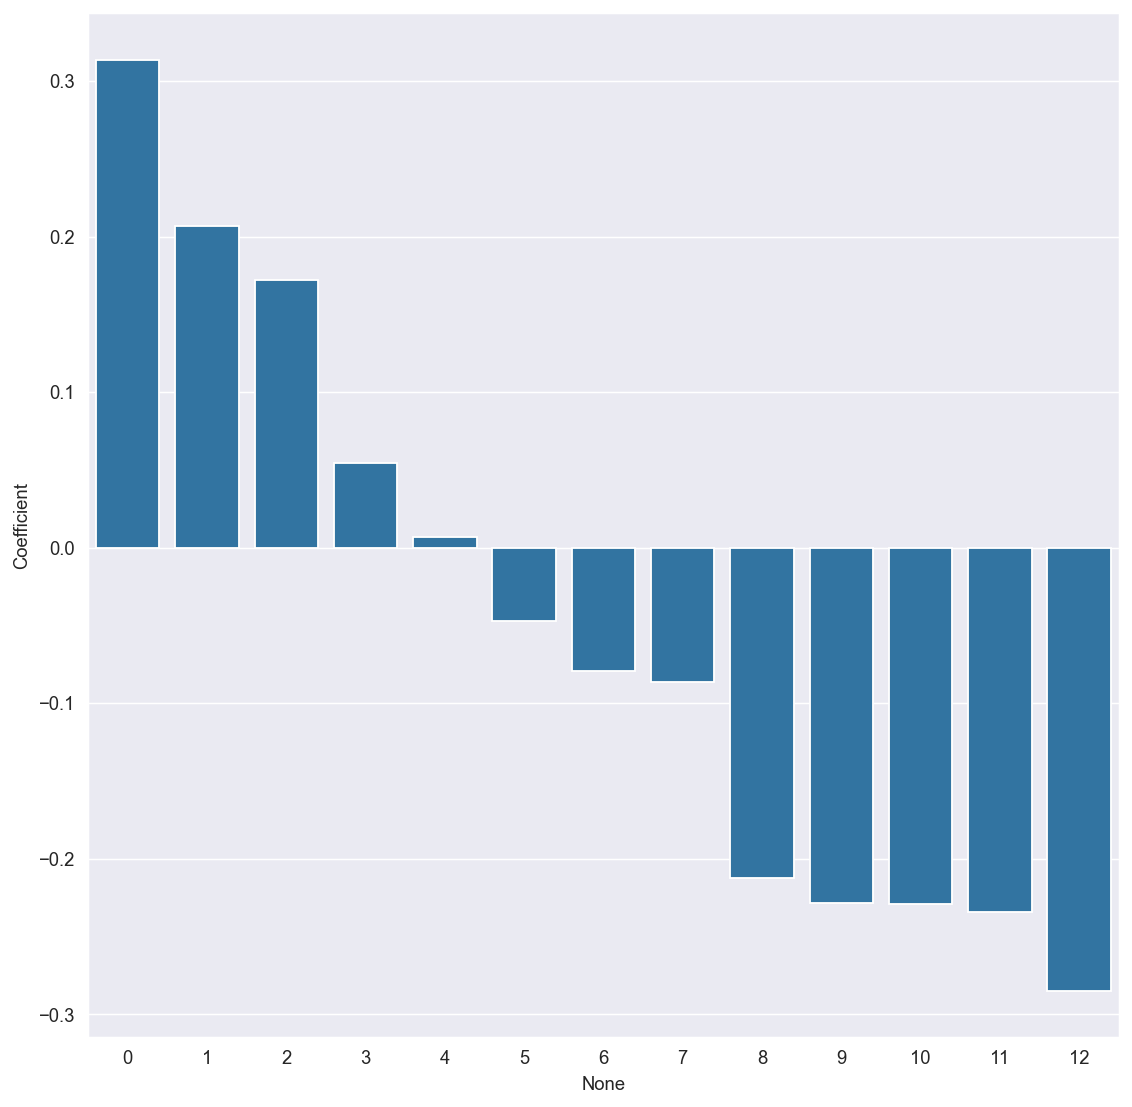

In [60]:
coefs_pandas = coefs.to_pandas()
plt.figure(figsize=(10,10), dpi=133, facecolor='w', edgecolor='k')
sns.barplot(x=coefs_pandas.index, y=coefs_pandas['Coefficient'])

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [53]:
# CODE HERE

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [57]:
# CODE HERE

In [61]:
y_pred = grid_model.predict(scaled_X_test)

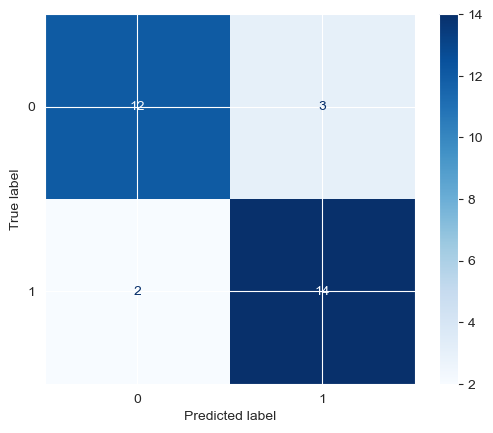

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [59]:
# CODE HERE

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [78]:
grid_model.best_estimator_

LogisticRegression(C=0.04648733708020256)

In [79]:
grid_model.best_params_

{'C': 0.04648733708020256}

In [80]:
accuracy_score(y_test, y_pred)

0.8387096774193549

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

In [64]:
# CODE HERE

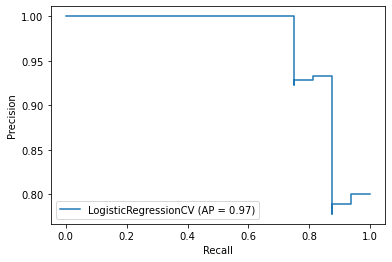

In [66]:
# CODE HERE

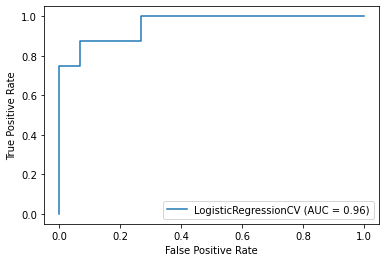

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [68]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [1]:
# CODE HERE

In [71]:
# EXPECTED PREDICTION

array([0], dtype=int64)

In [72]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)

array([[9.99999862e-01, 1.38455917e-07]])

----

## Great Job!